# Семинар 1
## Введение в машинное обучение

## Введение в контекст задачи

### Retention rate
Одной из самых важных бизнес-метрик для многих компаний является customer retention. В разных областях конкретный метод подсчета может отличаться, но это всегда число, которое показывает насколько хорошо мы удерживаем клиента. 

Чем выше customer retention, тем эффективнее тратится бюджет, заложенный на рекламу, потому что уже привлеченный клиент остается с нами дольше. Самый верный способ удерживать клиентов -- это просто создание самого лучшего продукта на рынке. Эта задача очень сложная, но иногда и хорошего продукта не хватает, чтобы клиент не ушел. 

### Подкупаем уходящих клиентов
Чтобы удержать клиента существует чит-код, которым часто пользуются компании: в момент, когда клиент собирается уйти, компания может предложить ему *большую скидку* или как-то еще *улучшить условия*, чтобы удержать клиента. При этом удержав клиента сейчас и потратив какие-то ресурсы, в будущем компания рассчитывает покрыть эти затраты и выйти в плюс. 

Вы наверняка сталкивались с такими предложениями. Вот несколько примеров из жизни:

* Если написать заявление на перенесение номера телефона к другому оператору сотовой связи, то оператор почти всегда предложит вам очень выгодный тариф, не доступный для обычных клиентов.
* Если какое-то время не заказывать доставку еды в Elementary, то они пришлют промокод на 30% скидку.

    <a href="https://ibb.co/tXzBbk6"><img src="https://i.ibb.co/8cbMjTw/2021-12-04-13-12-48.png" alt="2021-12-04-13-12-48" border="0" width="50%" height="50%"></a>

* Если попробовать закрыть кредитную карту, то вам могут предложить вместо закрытия обнулить плату ежегодную плату за обслуживание.

### Машинное обучение, чтобы находить уходящих клиентов

Если мы подкупим клиента еще до того, как он принял решение уйти, то скорее всего получится уговорить его остаться за меньшее число ресурсов. Чтобы понимать какие клиенты скоро задумаются об уходе, нам нужно делать предсказания. Именно этим и занимается машинное обучение! Сегодня мы поработаем с [открытым датасетом от телеком компании](https://www.kaggle.com/barun2104/telecom-churn). Это табличка с числами, описывающими клиента в некоторый момент времени, а также то, произошло ли событие *«ушел ли клиент в течение n месяцев с момента описания»*‎ (среднее значение этой колонки и есть на retention).

<a href="https://ibb.co/swLhH2G"><img src="https://i.ibb.co/zRK1JrY/2021-12-04-12-06-43.png" alt="2021-12-04-12-06-43" border="0" width="60%" height="60%"></a>


### Конспект
В общем, мы видим, что:
* Улучшение продукта - основной источник высокого retention rate;
* Уходящих клиентов можно как-то подкупить, чтобы они остались;
* Чтобы подкупать клиентов дешевле, нам нужно находить тех, кто собирается уйти раньше. Для этого используется ML;
* Чтобы понять, каким количеством денег мы можем подкупить клиента, нам нужно хорошо посчитать. Этим мы займемся в конце занятия;

### Прежде чем переходить к основной задаче, давайте поставим для себя несколько дополнительных
* Можно ли отделить потенциально отточных пользователей по их признакам в метрическом пространстве не зная кто из действительно отточный?
* Есть ли еще какие-то группы пользователей, которые могут влиять на отток или может быть ему предшествовать?

## Какие инструменты мы будем использовать

Библиотеки питона, которые мы сегодня используем

* `pandas` - вы уже с ней знакомы, это стандартная библиотека для работы с табличными данными
* `sklearn` - библиотека с метриками, методами предобработки данных, моделями машинного обучения и многим другим.
* `matplotlib` - самая популярная библиотека для рисования графиков на питоне.
* `seaborn` - библиотека для рисования графиков, написанная над `matplotlib`, имеет дополнительные возможности + если сделать `import seaborn as sns; sns.set()`, то она сразу же сделает ваши графики на matplotlib красивее!

## Делаем быстрые предсказания

Чтобы показать всю силу машинного обучения, мы сейчас быстро сделаем предсказания, никак не обрабатывая данные. 

Почти всегда, когда вы хотите решать какую-то реальную задачу, стоит сделать этот этап. Качество, которое мы сейчас получим будет базовым значением, относительно которого мы будем смотреть улучшения от дальнейших действий.

In [ ]:
# Скачаем наш датасет
! wget https://www.dropbox.com/s/ofr99e7skcd515m/telecom_churn.csv

--2023-02-01 09:19:54--  https://www.dropbox.com/s/ofr99e7skcd515m/telecom_churn.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6027:18::a27d:4812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/ofr99e7skcd515m/telecom_churn.csv [following]
--2023-02-01 09:19:55--  https://www.dropbox.com/s/raw/ofr99e7skcd515m/telecom_churn.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1aca44434b23de28474e565ed1.dl.dropboxusercontent.com/cd/0/inline/B1ptHvBXd3YAh2G7Q2sxra9U44jU-2GNYr2lvktdnadoZulzN4g0-T-IssBasaajZti_hKyETjGqapjl69xiqs5HT5_TCRioOSBYJ_uAlN_PYoK_0yiTQ4W-D7BkCPGnTmRpEYGMJATKVpfTJH8KyptTM6RKfsgYQV_5ZTDgXwqt2A/file# [following]
--2023-02-01 09:19:56--  https://uc1aca44434b23de28474e565ed1.dl.dropboxusercontent.com/cd/0/inline/B1ptHvBXd3YAh2G7Q2sxra9U44jU-2GNYr2lvktdnadoZulzN4g0-T-IssBasa

Прочитаем данные

In [ ]:
import pandas as pd
import numpy as np

# Считаем наш датасет при помощи библиотеки pandas
data = pd.read_csv('telecom_churn.csv')

In [ ]:
# Посмотрим на наш датасет
data.sample(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2362,0,101,1,0,0.25,3,217.7,118,59.5,11.59,0.0
1347,0,111,1,0,0.00,0,224.9,117,55.0,9.60,10.3
1522,0,62,1,0,0.29,1,159.9,100,44.9,8.61,5.6
928,0,205,1,1,2.11,2,175.8,139,65.1,7.75,7.8
2975,0,80,1,0,0.00,0,151.5,89,37.0,6.59,11.8
480,0,166,1,0,0.21,1,181.4,108,55.1,12.69,11.6
151,0,117,1,0,0.00,1,102.8,119,36.0,10.34,10.1
2633,0,63,1,0,0.19,0,180.5,126,52.9,11.50,10.6
2073,0,140,1,0,0.00,1,160.5,114,48.0,12.03,11.3
624,0,126,1,0,0.00,0,161.4,110,47.0,11.03,5.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


Что мы можем увидеть из данных? Какая это задача: регрессия или классификация?

In [ ]:
# Посмотрим на то, сколько у нас объектом каждого класса и какая доля первого класса
print(f"Размер нулевого класса: {sum(data.Churn == 0)}")
print(f"Размер первого класса:  {sum(data.Churn == 1)}")
print(f"Доля первого класса:   {sum(data.Churn == 1) / len(data.Churn)}")

Размер нулевого класса: 2850
Размер первого класса:  483
Доля первого класса:   0.14491449144914492


In [ ]:
# Разделим табличку на признаки (то, чем можно пользоваться при предсказании) и метки (то, что мы собираемся предсказывать)

X = data.drop(columns='Churn')
y = data['Churn']

Раздлеим признаки и метки на две части train и validation. Сейчас мы не будем делать test часть, потому что

* Мы пока делаем глупое тестирование метода. Т.е. не будет data leak. Что это такое расскажем сразу после глупого алгоритма.

* Данные для test части стоит собирать отдельно, чтобы она точно не была похожа на train из-за того, что их собрали в одну дату, или собрал один человек, или еще по какой-то нечестной причине.

* У нас мало данных, качество алгоритмов сильно снизится, если мы заберем данные еще и на тест.

In [ ]:
from sklearn.model_selection import train_test_split

# Воспользуемся библиотекой train_test_split, чтобы разбить данные на обучение и тест
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
# Посмотрим на обучающую часть данных
X_train

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
2046,120,1,0,0.00,1,149.2,98,42.0,9.68,11.1
747,155,1,0,0.34,1,184.6,102,52.4,9.80,7.8
180,94,0,1,2.57,4,197.1,125,77.7,10.73,9.5
2968,160,1,0,0.00,1,234.9,136,63.0,13.54,13.9
534,67,1,0,0.22,4,310.4,97,61.2,3.33,9.2
...,...,...,...,...,...,...,...,...,...,...
3313,127,1,0,0.00,1,102.8,128,30.0,7.19,10.0
3325,78,1,0,0.23,2,193.4,99,45.3,5.85,9.3
1414,182,1,0,0.35,1,176.1,90,48.5,8.75,9.7
1691,95,1,0,0.00,2,269.0,120,66.0,11.69,7.3


Для решении основной части задачи нам необходимо использовать алгоритм, который классифицирует объекты. Один такой мы уже знаем -- это алгоритм kNN или если полное название -- алгоритм k ближайших соседей.

In [ ]:
# Испортируем класс классификатора из модуля neighbors библиотеки sklearn (главной библиотеки дата саентиста)
from sklearn.neighbors import KNeighborsClassifier

# Создадим объект-классификатор knn с 5 ближайшими соседями
knn = KNeighborsClassifier(n_neighbors=5)

Вызовем метод **`.fit(X, y)`**. Для моделей в sklearn этот метод вызывает обучение на предоставленных данных. 
* X - матрица c размерностью [**количество обучающих объектов** $\times$ **количество признаков для каждого объекта**], в каждой клетке лежит значение конкрентного признака для конкретного объекта

* y - вектор с размерностью [**количество обучающих объектов**], в каждой клетке лежит 0 или 1:
    - 0 - клиент остался с нами,
    - 1 - клиент ушел.

Метод k ближайших соседей на самом деле не учится, поэтому метод **`.fit(X, y)`** выполнится очень быстро -- объекту knn нужно просто запомнить данные, которые мы ему дали.

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

Теперь сделаем предсказания с помощью метода **`.predict(X)`**. Заметьте, что в метод **`.fit(X, y)`** мы подавали матрицу с признаками и вектор с правильными ответами. В метод **`.predict(X)`** мы подаем только матрицу с признаками, потому что мы хотим сделать предсказание и предполагаем, что ответы нам могут быть недоступны. 

Номера колонок в матрице, которую мы подавали в **`.fit(X, y)`** и в **`.predict(X)`** должны совпадать. Т.е. если признак "среднее число минут на звонок" был третьим в матрице, которую мы подали в метод **`.fit(X,y)`**, то он же должен быть третьим в матрице, которую мы подаем в метод **`.predict(X)`**

In [ ]:
preds_valid = knn.predict(X_valid)
preds_valid

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

После получения предсказаний нужно проверить, насколько они получились хорошими. Воспользуемся метрикам accuracy, precision и recall. Подробнее об этих метриках мы поговорим на семинаре посвященном задачи классификации, а сейчас просто опишем то, что они из себя представляют:
* `accuracy` -- доля верно угаданных объектов
* `precision` -- доля верно помеченных объектов класса 1 среди всех помеченных единицей объектов (тут мы не смотрим как много мы пометили объектов, то есть даже если мы пометили всего один объект классом один и угадали, то эта метрика будет равна максимальному значению -- единице)
* `recall` -- доля верно помеченных объектов класса 1 среди всех объектов класса 1.

**NOTE:** `precision` и `recall` -- это точность и полнота ответов нашего алгоритма

In [ ]:
# Эти метрики реализованы в модуле metrics библиотеки sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Посчитаем метрики для нашего алгоритма
print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
print(f'Precision = {precision_score(y_valid, preds_valid)}')
print(f'Recall    = {recall_score(y_valid, preds_valid)}')

Accuracy  = 0.8860569715142429
Precision = 0.717948717948718
Recall    = 0.3010752688172043



Приходим к очень интересной ситуации, accuracy=90%. Т.е. для 90% мы предсказываем  правильный исход. 

**Кажется это очень хорошо! Идем за шампанским и закрываем вкладку с курсом?🍾🍾🍾🍾?**

**NOTE:** Цифры могут менять в зависимости от random_seed и версии библиотеки sklearn.  

Нет, precision=71% и recall=30%. Это значит, что
* Серди тех, для кого мы предсказали 1 (т.е. решили, что они уйдут), всего лишь чуть больше двух третей действительно собиралась уйти;
* Среди тех, кто действительно ушел, мы нашли только 30%. Т.е. если бы мы даже предложили максимально щедрое предложение, призванное удержать клиента, мы бы смогли удержать только 30%. 

## Время вспомнить о нашей вспомогательной задаче

Давайте воспользуемся методом `k-means`, чтобы понять можно ли выделить отточных клиентов от не отточных, а методом `DBSCAN` сколько у нас выделяется кластеров.

In [ ]:
# Импортируем нужные библиотеки из модуля cluster библиотеки sklearn
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
# Создадим объект класса k-means с числом кластеров, равным 2, а объект класса DBSCAN c параметрами по умолчанию
kmeans = KMeans(n_clusters=2, random_state=0)
dbscan = DBSCAN()

# Обучим их на обучающем датасете
kmeans.fit(X_train)
dbscan.fit(X_train)

# И сделаем предсказание на нем же 
y_kmeans = kmeans.predict(X_train)
y_dbscan = dbscan.labels_

In [ ]:
y_kmeans

array([1, 0, 0, ..., 1, 0, 0], dtype=int32)

In [ ]:
y_dbscan #-1 -означает, что точки являются выбросами (не относятся ни к какому кластеру) 

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
np.unique(y_dbscan)

array([-1])

In [ ]:
# Посмотрим на ответ kmeans: На то, сколько у нас элементов кластера 1 и сколько элементов кластера 0
print(f"Элементов в нулевом кластере: {len(y_kmeans[y_kmeans == 0])}, в первом: {len(y_kmeans[y_kmeans == 1])}")

Элементов в нулевом кластере: 1299, в первом: 1367


In [ ]:
# Давайте посмотрим в каком кластере какой процент класса 1 содержится
print(f"В нулевом кластере находится {len(y_train[(y_kmeans == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом кластере находится  {len(y_train[(y_kmeans == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В нулевом кластере находится 0.6025641025641025 от класса 1
В первом кластере находится  0.3974358974358974 от класса 1


Сделать однозначного вывода не удается, хоть в одном кластере на 20% больше отточников. Получившиеся два кластера достаточно слабо отличаются с точки зрения содержания отточных абонентов.
Нужно обработать датасет и попробовать снова

In [ ]:
# Посмотрим на ответы DBSCAN: сколько кластеров он выделил (-1 он выжает на объекты, которые он считает выбросами)
# Воспользуемся для этого, например, функцией unique библиотеки numpy
print(f"Число кластеров: {np.unique(y_dbscan)}")

Число кластеров: [-1]


Видно, что DBSCAN соединил все данные в один кластер. Мы можем попытаться добиться большего числа кластеров, поэкспериментируя с параметором eps, который задает радиус близости точек.

In [ ]:
# В цикле переберем значения eps от 0.001 до 0.5 и будем выводить то значение параметра, при котором у нас  оказалось больше 1 кластера
# Множество равно удаленных точек между заданными границами можно задать функцией linspace библиотеки numpy
for eps in np.linspace(0.001, 0.5, 50):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(X_train)
    y_dbscan = dbscan.labels_
    if len(np.unique(y_dbscan)) > 2:
        print(eps, len(np.unique(y_dbscan)) - 1)

Это также нам не помогло, а это может значить либо то, что нет в наших данных отделенных геометрических структур, либо то, что выделить их с сырыми данными не выйдет.

## Улучшение предсказаний

### Анализ данных

Когда вы считываете таблички с данными всегда нужно проверить несколько вещей.

<a href="https://ibb.co/vJHt3Nn"><img src="https://i.ibb.co/K9X12tv/2021-12-04-14-09-42.png" alt="2021-12-04-14-09-42" border="0" width="80%" height="80%"></a>

In [ ]:
# Посмотрим еще раз на наши сырые данные
data

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


### Анализ целевой переменной

Целевая переменная в данном случае Churn. Он = 1, когда клиент ушел, и = 0, когда клиент остался.

Посмотрим еще раз на наш таргет

In [ ]:
# Посмотрим на то, сколько у нас объектом каждого класса и какая доля первого класса
print(f"Размер нулевого класса: {sum(data.Churn == 0)}")
print(f"Размер первого класса:  {sum(data.Churn == 1)}")
print(f"Доля первого класса:   {sum(data.Churn == 1) / len(data.Churn)}")

Размер нулевого класса: 2850
Размер первого класса:  483
Доля первого класса:   0.14491449144914492


Т.е. у нас 14.5% клиентов а датасете ушло. Дисбаланс классов есть, но не слишком большой. Если бы распределение у нас было 50% на 50%, то мы могли бы использовать простую метрику **accuracy**, в качестве основной. Но из-за распределения 85% на 15% мы этого уже сделать не можем и нам придется использовать **precision**, **recall**, **roc auc** и т.п. 

Не смотря на то, что у нас не слишком большой дисбаланс и делать **stratified** разделение на train/val/test не обязательно, мы все равно его будем делать (и вам советуем всегда к этому прибегать, если вы строите классификацию, поскольку это "бесплатный" способ гарантировать одинаковое распределение классов). **Stratified** значит, что мы не просто случайно разделяем данные на train/val/test, а делаем так, что если train часть это 70% датасета, то в ней содержится ровно 70% обхектов с классом 1.

<a href="https://ibb.co/pj8Z6xS"><img src="https://i.ibb.co/60xbcmk/2021-12-04-14-55-36.png" alt="2021-12-04-14-55-36" border="0" height=500></a>

### Теперь посмотрим на признаки. 

Во-первых проверим наличие пропущенных значений. Если пропущенные значения на что-то заменили и мы не увидим их сейчас, то увидим позже, когда нарисуем графики для всех признаков.

In [ ]:
# Выделим из данных только признаки
X = data.drop(columns='Churn')

# Посмотрим на разные статистики признаков при помощи метода describe
X.describe()

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [ ]:
# Посмотрим есть ли в наших данных пропуски при помощи метода isna
is_missing = X.isna()
is_missing

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
3328,False,False,False,False,False,False,False,False,False,False
3329,False,False,False,False,False,False,False,False,False,False
3330,False,False,False,False,False,False,False,False,False,False
3331,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Посчитаем число пропусков по каждому из признаков, просто просуммировав матрицу is_missing
is_missing.sum()

AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

Ура! Просто пропущенных признаков нет. 

### Посмотрим на типы признаков

**Числовые признаки:**

1. AccountWeeks
2. DataUsage
3. CustServCalls
4. DayMins
5. DayCalls
6. MonthlyCharge
7. OverageFee
8. RoamMins

**Категориальные признаки:**

1. ContractRenewal
2. DataPlan



### Что делать с категориальными признаками 
Очень многие алогритмы на вход требуют вектора из обычных чисел. Если у нас есть категориальный признак, то он обычно кодируется с помощью целых чисел (0, 1, 2, итд) или с помощью строчек. 

Рассмотрим пример. У нас будут данные про каких-то людей. В данный момент не важно, для чего именно мы собираемся использовать эти данные.

In [ ]:
people_data = pd.DataFrame({
    'City': ['Дубай', 'Москва', 'Амстердам', 'Москва', 'Москва'],
    'Weight': [88, 110, -10, 56, 43],
    'Name': ['Андрей', 'Анатолий', 'Unknown', 'Светлана', 'Виктория']
})
people_data

,City,Weight,Name
0,Дубай,88,Андрей
1,Москва,110,Анатолий
2,Амстердам,-10,Unknown
3,Москва,56,Светлана
4,Москва,43,Виктория


Эту табличку **нельзя** подать в почти любую модель машинного обучения, потому что в ней есть строчки. От этих строчек надо как-то избавиться. Первое, что приходит в голову -- заменить строчки на числа. Мы создадим списки из уникальных значений колонки City и Name, заменим каждую строчку на ее индекс в этом списке.

In [ ]:
city_list = list(people_data['City'].unique())
name_list = list(people_data['Name'].unique())
city_list, name_list

(['Дубай', 'Москва', 'Амстердам'],
 ['Андрей', 'Анатолий', 'Unknown', 'Светлана', 'Виктория'])

In [ ]:
people_data['City'] = people_data['City'].apply(lambda city_string: city_list.index(city_string))
people_data['Name'] = people_data['Name'].apply(lambda name_string: name_list.index(name_string))
people_data

,City,Weight,Name
0,0,88,0
1,1,110,1
2,2,-10,2
3,1,56,3
4,1,43,4


Ура, у нас теперь все значения в табличке это числа. Но такие данные все равно нельзя подавать в большинство моделей машинного обучения (про исключения поговорим на соответствующей лекции). 

Для нашей модели города, закодированные целыми числами будут выглядеть как на рисунке ниже. Если мы сразу подадим эти числа в модель, то она не будет знать, что это города, и изначально будет считать, что **Дубай** в каком-то смысле ближе к **Москве**, чем к **Амстердаму**. Т.е. мы навязываем нашей модели порядок городов.

<a href="https://ibb.co/8m2dwqC"><img src="https://i.ibb.co/Jc2yTV1/2021-12-04-16-31-10.png" alt="2021-12-04-16-31-10" border="0" width=40%></a>

Какой же у нас тогда выход? Мы можем закодировать категориальные признаки разными способами, но самый простой и широко применимый это one-hot-encoding. 

<a href="https://ibb.co/F5X21Vh"><img src="https://i.ibb.co/hBcbNfg/2021-12-04-16-45-31.png" alt="2021-12-04-16-45-31" border="0" width=25%></a>

In [ ]:
people_data_one_hot = pd.get_dummies(people_data, columns=['City', 'Name'])
people_data_one_hot

,Weight,City_0,City_1,City_2,Name_0,Name_1,Name_2,Name_3,Name_4
0,88,1,0,0,1,0,0,0,0
1,110,0,1,0,0,1,0,0,0
2,-10,0,0,1,0,0,1,0,0
3,56,0,1,0,0,0,0,1,0
4,43,0,1,0,0,0,0,0,1


Какая проблема возникает при таком способе кодирования категориальных признаков?  
Нужны ли нам все эти новые столбцы?

---

Вернемся к нашим изначальным данным. У нас всего две колонки с категориальными признаками и при этом значения в них это 0 или 1. Для таких признаков нет смысла кодировать их с помощью one-hot-encoding, оставим их как есть. Просто посмотрим на распределения, чтобы убедиться, что нет аномалий.

In [ ]:
# Посчитаем сколько раз встречается каждое уникальное значение в колонке ContractRenewal при помощи метода value_counts
data['ContractRenewal'].value_counts()

1    3010
0     323
Name: ContractRenewal, dtype: int64

In [ ]:
# Посчитаем сколько раз встречается каждое уникальное значение в колонке DataPlan при помощи метода value_counts
data['DataPlan'].value_counts()

0    2411
1     922
Name: DataPlan, dtype: int64

Поскольку в наших категориальных признаках всего два уникальных значения (признак бинарный) и кроме того, уже представлен цифрами, нам нет необходимости их менять.

### Что делать с числовыми признаками

Числовые признаки это часто самые приятные для обработки признаки. Три очень полезных для анализа данных интсрумента это
* Гистограммы признаков
* Корреляции разных переменных
* Попарные графики

Они помогут вам понять данные лучше и за счет этого лучше выбирать модели. Сейчас мы рисуем их, чтобы, во-первых, научиться это делать, и во-вторых, начать тренировать насмотренность.

Начнем с **гистограм**. Гистограма это такой график, который показывает распределение значений. По горизонтальной оси отмечены значения признака, распределение которого мы хотим посмотреть. По вертикали отмечено число объектов. 

Для примера посмотрим на гистограммы ниже. Вы видите вертикальные столбики. Чем выше столбик, тем больше объектов попадает в область, которую он занимает по оси х.

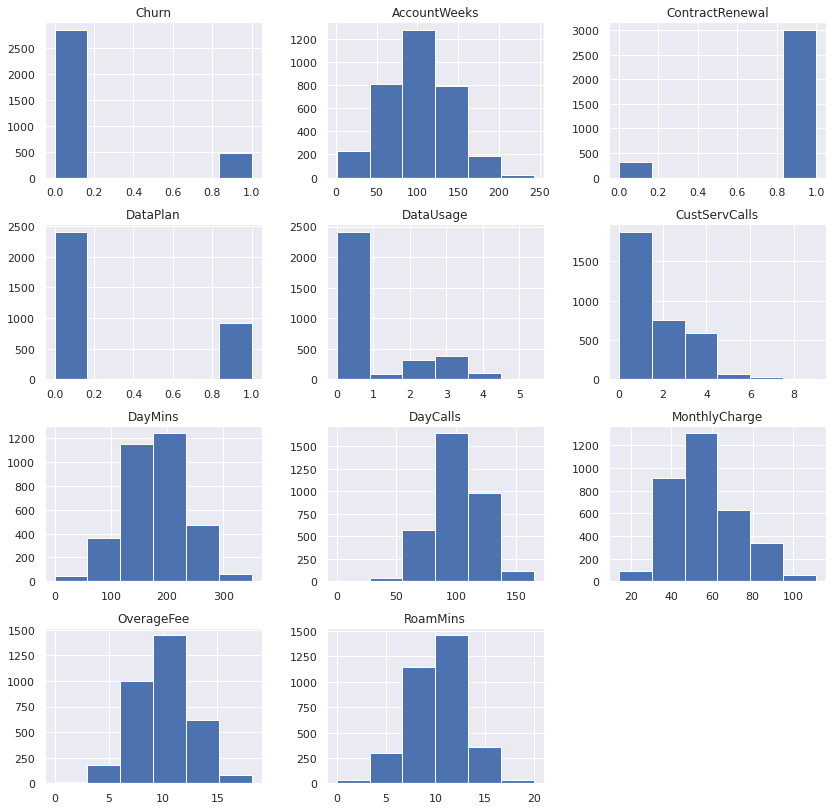

In [ ]:
# Импортируем библиотеки отрисовки
import seaborn as sns
import matplotlib.pyplot as plt 

# Улучшатор стилей в matplotlib
sns.set()

# Построим гистограммы наших данных с числом бинов 6
data.hist(bins=6, figsize=(14,14));

Все выглядит хорошо, посмотрим на корреляции.

**Корреляция** - понятие из статистики, про которое вы уже слышали. Это мера линейной зависимости между двумя случайными величинами. 

Рассмотрим пример, если корреляция между средней продолжительностью разговора за месяц и счетом за месяц равна 0.9, то если мы узаем, что у человека большая средняя продолжительность разговора, то можем предположить, что и счет у него большой. Большой а данном контексте значит "больше среднего по переменной".

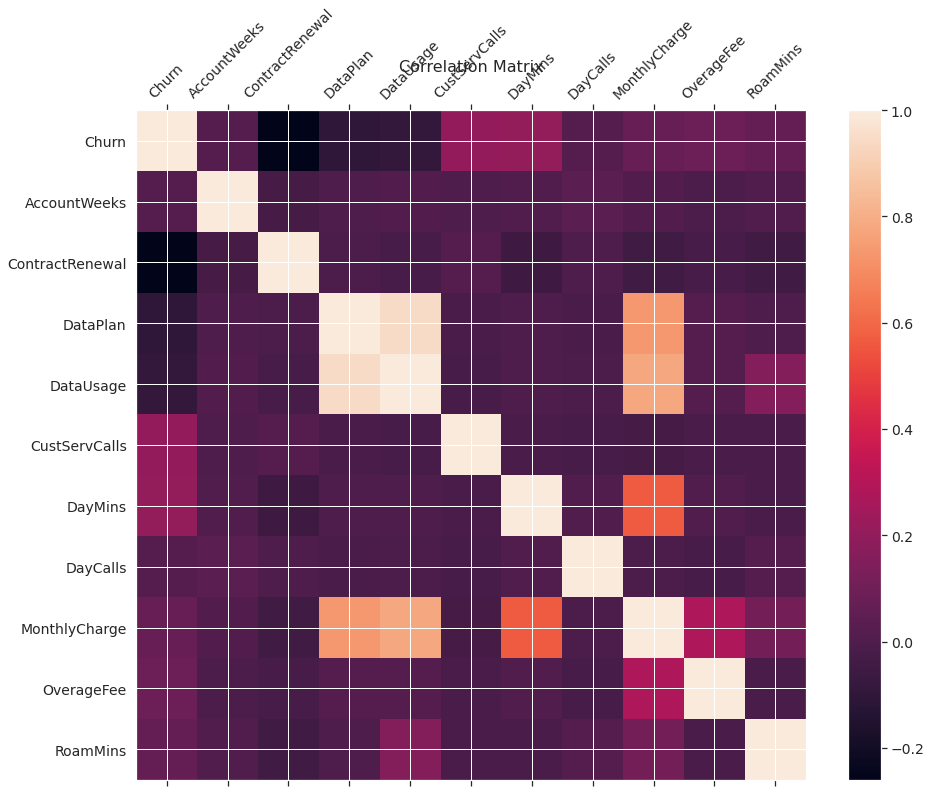

In [ ]:
f = plt.figure(figsize=(15, 12))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
# При помощи функции pairplot библиотеки seaborn построим графики для каждой пары признаков (укажем в качестве цветов точек колоску 'Churn')
sns.pairplot(data, hue='Churn')

Output hidden; open in https://colab.research.google.com to view.

Из интересного - если мы посмотрим на график совместного распределения CustServCalls и DayMin, то увидим, что для уходищих от нас пользователей есть две выраженные группы. 
1. Те, кто мало разговаривают (DayMins маленький), но много звонят в CustomerService
2. Те, кто много разговаривают (DayMins маленький), но мало звонят в CustomerService

В общем и целом, на этих графиках мы видим взаимодействие трех переменных. Эта информация очень полезна для создания новых признаков (Feature Engineering), убирания старых (Feature Selection) и выбора алгоритмов. Понимание как использовать такие графики придет с опытом.

## Анализ алгоритма

Сегодня мы концентрируемся на k ближайших соседей. Про алгоритм мы уже говорили на лекции.


<a href="https://ibb.co/d6MCxhX"><img src="https://i.ibb.co/QnQSt5h/2021-12-04-22-09-15.png" alt="2021-12-04-22-09-15" border="0" width=50%></a>


k ближайших соседей - очень хорошо изученный алгоритм, он даже теоретически идеален: если у нас есть бесконечный датасет для обучения, то с помщоью knn мы можем восстановить полностью всю зависимость. На самом деле, бесконечный датасет даже и не нужен. Нам нужно просто иметь около каждой точки пространства достатоно много примеров, чтобы мы хорошо могли оценить вероятность каждого из классов.

Самая большая проблема knn - проклятие размерности. Когда у нас становится много признаков, плотность обучающих примеров в n-мерном пространстве резко снижается. 

<a href="https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/"><img src="https://www.visiondummy.com/wp-content/uploads/2014/04/curseofdimensionality.png" alt="2021-12-04-22-09-15" border="0" width=70%></a>

С увеличением размерности, все больше объектов обучающей выборки находятся в "углах" пространства признаков.

<a href="https://www.visiondummy.com/2014/04/curse-dimensionality-affect-classification/"><img src="https://www.visiondummy.com/wp-content/uploads/2014/04/sparseness.png" alt="2021-12-04-22-09-15" border="0" width=70%></a>


Отсюда вытекают сильные и слабые стороны KNN

Плюсы:
* Хороший бейзлайн.
* Хорошая интерпретируемость при небольшом числе признаков.
* Быстрый на небольших и средних данных.
* Теоретически идеален и не делает никаких предположений о зависимости

Минусы:
* Нужно хорошее пространство и метрика, чтобы он работал. Т.е. нужно отбирать признаки, уменьшать размерность данных, стандартизировать признаки и т.д.
* Если можно сделать какие-то предположения о природе данных, их нужно встраивать в модель через создание новых признаков или измение метрики, что очень сложно и требует опыта.



### Что мы будем делать 

У нас нет пропусков, что значительно облегчает задачу.

* Стандартизируем признаки
* Снизим размерность с помощью Principal Component Analysis (с ним мы подробно познакомимся на семинаре по линейной алгебре, а сегодня обсудим интуицию). Судя по графикам корреляции мы сможем снизить размерность на 3-5 совсем без потерь.
* Переберем метрики и k neighbors.
* Попробуем применить к новым данным методы кластеризации.

In [ ]:
# Проделаем тот же пайплайн с загрузкой данных, разделением на признаки и таргеты и разделение на оубчение и тест, что и раньше
data = pd.read_csv('telecom_churn.csv')

X = data.drop(columns='Churn')
y = data['Churn']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

Стандартизируем признаки перед применением PCA. Даже без PCA нам пришлось бы стандартизировать признаки, потому что KNN плохо работает в случае, если у признаков плохой scale.


Представим,  что по оси x1 - площадь квартиры в десятках квадратных метров, а по оси x2 - оценка продавцом уровня шума в квартире из-за дороги. Из-за того, что единицы измерения по оси x2 другие, то ось x1 имеет очень мало веса.

<img src="https://i.stack.imgur.com/OCUmI.png" alt="2021-12-04-22-09-15" border="0" width=49%> <img src="https://i.stack.imgur.com/J5r01.png" alt="2021-12-04-22-09-15" border="0" width=49%>

Познакомимся с новым типом объектов в sklearn: Transformer. У них есть два основных метода .fit() и .transform(). Эти объекты учатся на обучающей выборке и потом могут преобразовывать данные. В нашем случае, Standard Scaler при обучении запоминает среднее и дисперсию для каждого признака. После он нормирует данные, используя их. 

$$x_{new} = \frac{x-mean}{std}$$

Вообще, нормировать признаки стоит почти всегда. Это очень важно для
* Метрических алогритмов
* Линейных алогритмов (мы еще узнаем, что признаки хорошо не только отнормировать, но и как можно сильнее приблизить их распределение к нормальному). Сюда относятся как всевозможные регрессии, так и PCA, который мы используем ниже.

Нормировка не важна разве что для алгоритмов, основанных на решающих деревьях о которых мы поговорим в нашем курсе позже.

In [ ]:
# Импортируем класс StandardScaler из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler

# Создадим экземпляр класса StandardScaler
scaler = StandardScaler()

# Обучим его на обучающем датасете
scaler.fit(X_train, y_train)

StandardScaler()

In [ ]:
# Применим обученный scaler к обучающему и валидационному датасетам при помощи метода transform
X_train_normed = scaler.transform(X_train)
X_valid_normed = scaler.transform(X_valid)

Теперь применим PCA. На лекции мы расскажем про него подробнее позже. Необходимость его использования без объяснения на лекции вызвана практикоориентурованностью нашего семинара. Намного ценнее увидеть, как что-то работает в подходящем окружении, чем опустить необходимый алгоритм из-за того, что его нужно проходить в лекции, которая стоит позже.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/300px-GaussianScatterPCA.svg.png" alt="2021-12-04-22-09-15" border="0" width=30%>

В целом алгоритм утроен так: 
* мы ищем направление, вдоль которой есть наибольший разброс данных и фиксируем это напрвление как первую компоненту
* после среди всех направлений, перпендикулярных первому мы ищем направление с наибольшим разбросом. Это вторая компонента.
* после среди всех направлений, перпендикулярных первому и второму мы ищем направление с наибольшим разбросом. Это тертья компонента.
и т.д...

После мы оставляем только k первых компонент и в качестве новых признаков берем проекции старых точек на эти направления. Получается k новых признаков.

На рисунке видно, что если у двух признаков большая корреляция (когда один большой, то и другой тяготеет в большую сторону, и наоборот), то мы можем вместо двух чисел взять одно и почти не потерять информации.


Выбрать сколько именно признаков оставить - сложная задача, обычно люди просто перебирают разные значения) 

In [ ]:
# Посмотрим на размер исходных признаков
X_train.shape

(2666, 10)

In [ ]:
# Импортируем метод PCA из модуля decomposition библиотеки sklearn
from sklearn.decomposition import PCA

# Создадим объект класса PCA с число главных компонент, равным 7
pca = PCA(n_components = 7)

# Обучим PCA на нормированных признаках
pca.fit(X_train_normed, y_train)

PCA(n_components=7)

In [ ]:
# Преобразуем наши данные при помощи метода transform
X_train_pca = pca.transform(X_train_normed)
X_valid_pca = pca.transform(X_valid_normed)

### Пожмем плоды и обучим модель

In [ ]:
# Модель
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
preds_valid = knn.predict(X_valid_pca)

# Тестирование
print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
print(f'Precision = {precision_score(y_valid, preds_valid)}')
print(f'Recall    = {recall_score(y_valid, preds_valid)}')

Accuracy  = 0.896551724137931
Precision = 0.7592592592592593
Recall    = 0.422680412371134


Ура! Мы улучшили обе метрики и precision и recall. А теперь попробуем сделать самописный GridSearch - поиск по сетке из гиперпараметров. Это будет не очень красиво, но очень наглядно.

In [ ]:
precisions = []
recalls = []

# В двойном цикле почслу компонент и числу соседей проведе весь описанный выше пайплайн
for pca_components in [10, 9, 8, 7, 6, 5]:
    for k_neighbors in [1, 2, 4, 5, 7]:
        scaler = StandardScaler()
        scaler.fit(X_train, y_train)
        X_train_normed = scaler.transform(X_train)
        X_valid_normed = scaler.transform(X_valid)

        pca = PCA(pca_components)
        pca.fit(X_train_normed, y_train)

        X_train_pca = pca.transform(X_train_normed)
        X_valid_pca = pca.transform(X_valid_normed)

        # Модель
        knn = KNeighborsClassifier(n_neighbors=k_neighbors)
        knn.fit(X_train_pca, y_train)
        preds_valid = knn.predict(X_valid_pca)

        # Тестирование
        print(f'Hyper parameters: pca_components={pca_components}, k_neighbors={k_neighbors}')
        print(f'Accuracy  = {accuracy_score(y_valid, preds_valid)}')
        precisions.append(precision_score(y_valid, preds_valid))
        print(f'Precision = {precisions[-1]}')
        recalls.append(recall_score(y_valid, preds_valid))
        print(f'Recall    = {recalls[-1]}')
        print()

Hyper parameters: pca_components=10, k_neighbors=1
Accuracy  = 0.8650674662668666
Precision = 0.5346534653465347
Recall    = 0.5567010309278351

Hyper parameters: pca_components=10, k_neighbors=2
Accuracy  = 0.8830584707646177
Precision = 0.7111111111111111
Recall    = 0.32989690721649484

Hyper parameters: pca_components=10, k_neighbors=4
Accuracy  = 0.8875562218890555
Precision = 0.75
Recall    = 0.3402061855670103

Hyper parameters: pca_components=10, k_neighbors=5
Accuracy  = 0.896551724137931
Precision = 0.7413793103448276
Recall    = 0.44329896907216493

Hyper parameters: pca_components=10, k_neighbors=7
Accuracy  = 0.8950524737631185
Precision = 0.7647058823529411
Recall    = 0.4020618556701031

Hyper parameters: pca_components=9, k_neighbors=1
Accuracy  = 0.8650674662668666
Precision = 0.5346534653465347
Recall    = 0.5567010309278351

Hyper parameters: pca_components=9, k_neighbors=2
Accuracy  = 0.8830584707646177
Precision = 0.7111111111111111
Recall    = 0.32989690721649484


Text(0.5, 1.0, 'Метрики моделей')

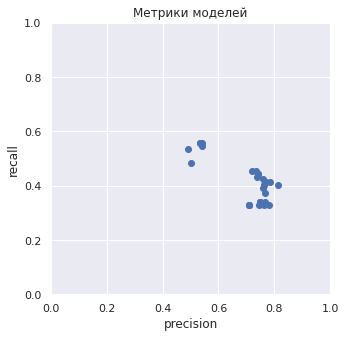

In [ ]:
plt.figure(figsize=(5, 5))

# Отрисуем метрики на графике scatter
plt.scatter(precisions, recalls)

plt.xlim((0, 1))
plt.ylim((0, 1))
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Метрики моделей')

Выбор лучшего набора параметров диктуется прикладной областью -- тем насколько дорого нам обходится ошибочное признание отточным клиента и насколько дорого обходится пропуск потенциально отточного клиента.

## А теперь вернемся к нашей вспомогательной задаче

Давайте оставим 7 главных компонент и попытаемся решить те же задачи, что и раньше.

In [ ]:
# Повторим пайплайн преобразования датастеа data -> scaled data -> PCA data
# Создаем StandardScaler и обучаем его на трейне
scaler = StandardScaler()
scaler.fit(X_train, y_train)

# Создаем PCA и обучаем его на нормализованном трейне
pca = PCA(n_components = 7)
pca.fit(X_train_normed, y_train)

# Применяем трансформации
X_train_normed = scaler.transform(X_train)
X_train_pca = pca.transform(X_train_normed)

In [ ]:
# Создадим объект класса k-means с числом кластеров, равным 2, а объект класса DBSCAN c параметрами по умолчанию
kmeans = KMeans(n_clusters=2, random_state=0)
dbscan = DBSCAN()

# Обучим их на обучающем датасете
kmeans.fit(X_train_pca)
dbscan.fit(X_train_pca)

# И сделаем предсказание на нем же 
y_kmeans = kmeans.predict(X_train_pca)
y_dbscan = dbscan.labels_

In [ ]:
# Посмотрим на ответ kmeans: На то, сколько у нас элементов кластера 1 и сколько элементов кластера 0
print(f"Элементов в нулевом кластере: {len(y_kmeans[y_kmeans == 0])}, в первом: {len(y_kmeans[y_kmeans == 1])}")

Элементов в нулевом кластере: 716, в первом: 1950


In [ ]:
# Давайте посмотрим в каком кластере какой процент класса 1 содержиться
print(f"В нулевом кластере находится {len(y_train[(y_kmeans == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом кластере находится  {len(y_train[(y_kmeans == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В нулевом кластере находится 0.17875647668393782 от класса 1
В первом кластере находится  0.8212435233160622 от класса 1


Видим, что теперь большая часть отточных клиентов сосредоточилась в нулевом кластере, но это к сожалению показыает лишь то, что структурно мы их все также плохо отличаем, поскольку сейчас нулевой кластер почти в 2.5 раза больше первого.

In [ ]:
# Посмотрим на ответы DBSCAN: сколько кластеров он выделил (-1 он выжает на объекты, которые он считает выбросами)
# Воспользуемся для этого, например, функцией unique библиотеки numpy
print(f"Число кластеров: {np.unique(y_dbscan)}")

Число кластеров: [-1  0]


Видим, что сейчас DBSCAN не видит структуры в данных, но мы снова попытаемся найти подходящий радиус

In [ ]:
# В цикле переберем значения eps от 0.1 до 5 и будем выводить то значение параметра, при котором у нас  оказалось больше 1 кластера
# Множество равно удаленных точек между заданными границами можно задать функцией linspace библиотеки numpy
for eps in np.linspace(0.1, 5, 50):
    dbscan = DBSCAN(eps = eps)
    dbscan.fit(X_train_pca)
    y_dbscan = dbscan.labels_
    if len(np.unique(y_dbscan)) - 1 > 1:
        print(eps, len(np.unique(y_dbscan))-1)

0.6 3
0.7000000000000001 19
0.8 24
0.9 18
1.0 11
1.1 9
1.2000000000000002 4
1.3000000000000003 3
1.4000000000000001 5
1.5000000000000002 5
1.6 4
1.7000000000000002 3
1.8000000000000003 2


Видим, что при eps = 1.3 нашлось 3 кластера. Давайте их повнимательнее рассмотрим -- посмотрим на то, какой процент отточников в них.

In [ ]:
dbscan = DBSCAN(eps = 1.3)
dbscan.fit(X_train_pca)
y_dbscan = dbscan.labels_

In [ ]:
# Давайте посмотрим в каком кластере какой процент класса 1 содержиться
print(f"В выбросах ({sum((y_dbscan == -1))}) находится {len(y_train[(y_dbscan == -1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В нулевом ({sum((y_dbscan == 0))}) кластере находится {len(y_train[(y_dbscan == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом ({sum((y_dbscan == 1))}) кластере находится {len(y_train[(y_dbscan == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"Во втором ({sum((y_dbscan == 2))}) кластере находится {len(y_train[(y_dbscan == 2) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В выбросах (523) находится 0.4119170984455959 от класса 1
В нулевом (1663) кластере находится 0.5284974093264249 от класса 1
В первом (477) кластере находится 0.05181347150259067 от класса 1
Во втором (3) кластере находится 0.007772020725388601 от класса 1


Неплохой результат!

Давайте проведем такой же анализ для другого eps. Например для eps=1.5

In [ ]:
dbscan = DBSCAN(eps = 1.5)
dbscan.fit(X_train_pca)
y_dbscan = dbscan.labels_

In [ ]:
# Давайте посмотрим в каком кластере какой процент класса 1 содержиться
print(f"В выбросах ({sum((y_dbscan == -1))}) находится {len(y_train[(y_dbscan == -1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В нулевом ({sum((y_dbscan == 0))}) кластере находится {len(y_train[(y_dbscan == 0) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В первом ({sum((y_dbscan == 1))}) кластере находится {len(y_train[(y_dbscan == 1) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"Во втором ({sum((y_dbscan == 2))}) кластере находится {len(y_train[(y_dbscan == 2) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В третьем ({sum((y_dbscan == 3))}) кластере находится {len(y_train[(y_dbscan == 3) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")
print(f"В четвертом ({sum((y_dbscan == 4))}) кластере находится {len(y_train[(y_dbscan == 4) & (y_train == 1)]) / len(y_train[y_train == 1])} от класса 1")

В выбросах (257) находится 0.22797927461139897 от класса 1
В нулевом (1829) кластере находится 0.6865284974093264 от класса 1
В первом (562) кластере находится 0.06994818652849741 от класса 1
Во втором (5) кластере находится 0.007772020725388601 от класса 1
В третьем (8) кластере находится 0.0051813471502590676 от класса 1
В четвертом (5) кластере находится 0.0025906735751295338 от класса 1


Можно сделать вывод -- в наших данных можно выделить структурыне кластеры, которые в том числе будут включать в себя большую часть отточных клиентов. Для того, чтобы увидеть эти структуры было бы удобно воспользоваться методами визуализации данных с понижением размерности, такие как SNE/t-SNE, с которыми мы познакомимся позже. А сейчас, дальнейших анализ кластеров предлагается слушателю в качестве самостоятельного упражнения!